# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
df = pd.read_csv("/kaggle/input/income/income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plotting the initial distribution of Age and Income

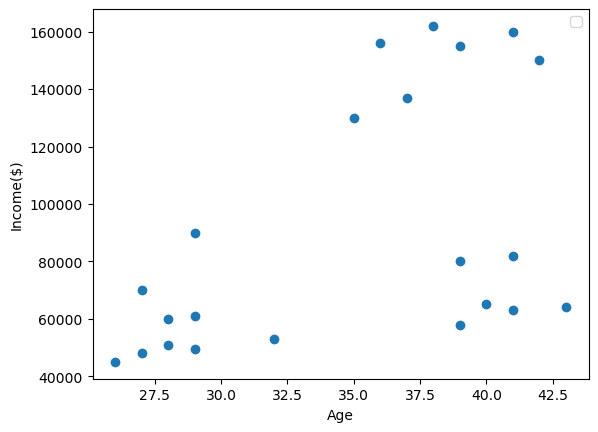

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [5]:
# Creating an instance of KMeans to find 3 clusters
km = KMeans(n_clusters=3)
# Using fit_predict to cluster the dataset
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


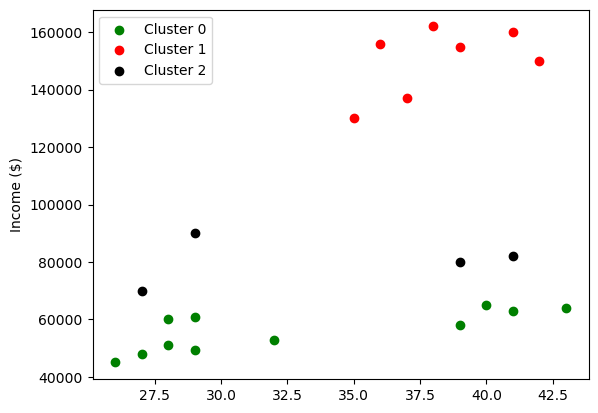

In [7]:
# Creating separate dataframes for each cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Plotting the clusters 
plt.scatter(df1.Age,df1['Income($)'],color='green', label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='black', label='Cluster 2')
    
plt.ylabel('Income ($)')
plt.legend()

# Scaling the Age and Income attributes

In [8]:
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


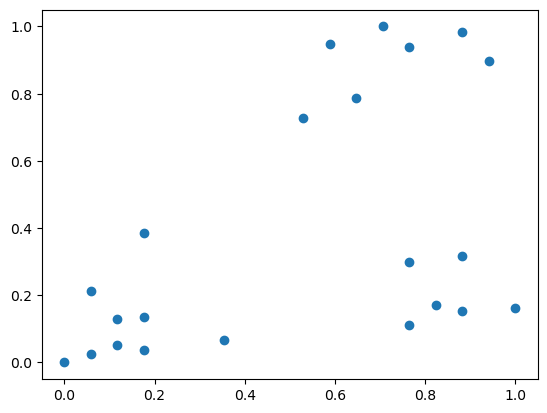

In [9]:
plt.scatter(df.Age,df['Income($)'])

# Clustering again after scaling

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [11]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [12]:
# Getting the cluster centers
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

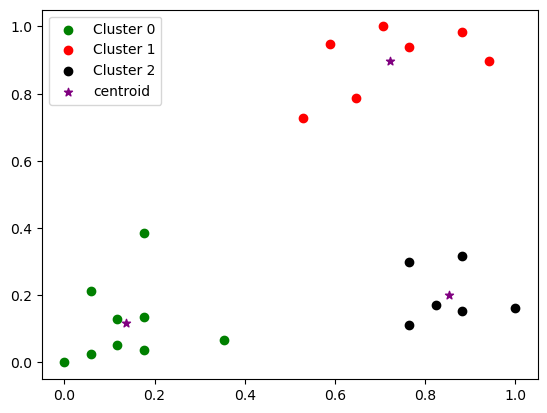

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Plotting the clusters 
plt.scatter(df1.Age,df1['Income($)'],color='green', label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Finding the optimal no. of clusters via elbow method

In [14]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
print(sse)

[5.434011511988178, 2.091136388699078, 0.4750783498553096, 0.34910470944195654, 0.2621792762345213, 0.22020960864009398, 0.181738117548309, 0.13265419827245162, 0.1038375258660356]


# Elbow Method

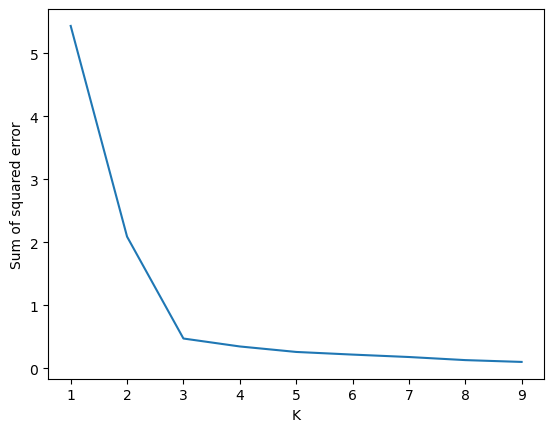

In [15]:
# Plotting the sum of squared errors for different number of clusters
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)